In [1]:
import numpy as np
import pandas as pd

In [3]:
#Here load the positions of DM from the file uploaded
X_DMPos = np.load('X_DMPos.npy')
Y_DMPos = np.load('Y_DMPos.npy')
Z_DMPos = np.load('Z_DMPos.npy')

In [4]:
print(len(X_DMPos), len(Y_DMPos), len(Z_DMPos))

94196375 94196375 94196375


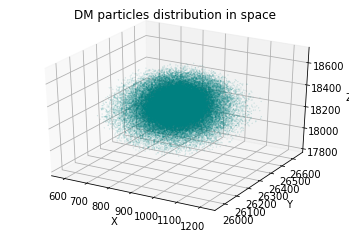

In [14]:
#Plot the distribution of DM in space
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

X_sample = X_DMPos[:100000]
Y_sample = Y_DMPos[:100000]
Z_sample = Z_DMPos[:100000]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

title = 'DM particles distribution in space'
ax.set_title(title)
ax.scatter(X_sample, Y_sample, Z_sample, s = 0.01, color = 'teal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.savefig('{}.png'.format(title))
plt.show()

In [5]:
N_cell = 10

(10, 10, 10)

In [31]:
def reduced(x, N_cell):
    x_reduced = x / max(x) * N_cell
    return x_reduced

In [ ]:
X_DMPos_reduced, Y_DMPos_reduced, Z_DMPos_reduced = reduced(X_DMPos, N_cell), reduced(Y_DMPos, N_cell), reduced(Z_DMPos, N_cell)

In [32]:
def celling(x, y, z, N_cell):
    #Here we devide the positions into 3d box and number of cells are N_cell
    for i in range(N_cell):
        print(i)
        for j in range(N_cell):
            for k in range(N_cell):
                x_in_range = np.where(abs(x - 0.5 - i) <= 0.5)[0]
                y_in_range = np.where(abs(y - 0.5 - j) <= 0.5)[0]
                z_in_range = np.where(abs(z - 0.5 - k) <= 0.5)[0]
                len_max = max(len(x_in_range), len(y_in_range), len(z_in_range))
                if len(x_in_range) != len_max:
                    x_in_range = np.concatenate((x_in_range, np.zeros(len_max - len(x_in_range))), axis = 0)
                if len(y_in_range) != len_max:                
                    y_in_range = np.concatenate((y_in_range, np.zeros(len_max - len(y_in_range))), axis = 0)
                if len(z_in_range) != len_max:            
                    z_in_range = np.concatenate((z_in_range, np.zeros(len_max - len(z_in_range))), axis = 0)
                my_list = np.intersect1d(x_in_range, y_in_range)
                my_list = np.intersect1d(my_list, z_in_range)
                cell_array[i][j][k] = len(my_list)
    return cell_array
#Now instead of every single DM positions, we have a N_cell^3-box, containing number of particles in each cell

In [ ]:
DM_cell_array = celling(X_DMPos_reduced, Y_DMPos_reduced, Z_DMPos_reduced, N_cell)

In [29]:
'''
#Here we devide the positions into 3d box and number of cells are N_cell
for i in range(N_cell):
    print(i)
    for j in range(N_cell):
        for k in range(N_cell):
            x_in_range = np.where(abs(X_DMPos_reduced - 0.5 - i) <= 0.5)[0]
            y_in_range = np.where(abs(Y_DMPos_reduced - 0.5 - j) <= 0.5)[0]
            z_in_range = np.where(abs(Z_DMPos_reduced - 0.5 - k) <= 0.5)[0]
            len_max = max(len(x_in_range), len(y_in_range), len(z_in_range))
            if len(x_in_range) != len_max:
                x_in_range = np.concatenate((x_in_range, np.zeros(len_max - len(x_in_range))), axis = 0)
            if len(y_in_range) != len_max:                
                y_in_range = np.concatenate((y_in_range, np.zeros(len_max - len(y_in_range))), axis = 0)
            if len(z_in_range) != len_max:            
                z_in_range = np.concatenate((z_in_range, np.zeros(len_max - len(z_in_range))), axis = 0)
            my_list = np.intersect1d(x_in_range, y_in_range)
            my_list = np.intersect1d(my_list, z_in_range)
            cell_array[i][j][k] = len(my_list)
print(cell_array)
#Now instead of every single DM positions, we have a N_cell^3-box, containing number of particles in each cell
'''

0
1
2
3
4
5
6
7
8
9
[[[  19650.   46217.   78155.  115439.   83963.  218890.   30510.
     18370.   27286.   15245.]
  [  38030.   65467.   87396.  127826.  229333.  102390.   36059.
     50702.   77679.   52839.]
  [  22783.   49333.  328041.  518689.   28776.   23691.   40809.
     67556.  104937.   47094.]
  [ 238681.  342329. 1430888.   78041.   48752.   71181.   46928.
    143914.  103937.  100054.]
  [ 316455.  129626.  135478.  134059.   51902.   52795.  164851.
    273585.  137072.   92700.]
  [  72991.   23656.   53507.  109792.  137753.   49854.   62667.
    177357.   39307.   38339.]
  [  96818.   89416.  103734.  137772.   73717.  261233.  140498.
    420463.   52128.  130846.]
  [  43899.   30981.   12522.  107815.  123287.  234817.   49764.
    125978.  271692.   88886.]
  [  54197.   31432.   10008.   53994.   51729.   22351.   18620.
     34729.   76844.   90026.]
  [  58017.   80345.   17929.   71408.   59241.   22910.   18460.
     10677.   19358.   23889.]]

 [[  891

In [33]:
#loading Subhalo data
X_SubhaloPos = np.load('X_SubhaloPos.npy')
Y_SubhaloPos = np.load('Y_SubhaloPos.npy')
Z_SubhaloPos = np.load('Z_SubhaloPos.npy')

In [34]:
print(len(X_DMPos), len(Y_DMPos), len(Z_DMPos))

94196375 94196375 94196375


In [35]:
X_SubhaloPos_reduced, Y_SubhaloPos_reduced, Z_SubhaloPos_reduced = reduced(X_SubhaloPos, N_cell), reduced(Y_SubhaloPos, N_cell), reduced(Z_SubhaloPos, N_cell)

In [36]:
#celling Subhalo positions
Subhalo_cell_array = celling(X_SubhaloPos_reduced, Y_SubhaloPos_reduced, Z_SubhaloPos_reduced, N_cell)

0
1
2
3
4
5
6
7
8
9


In [37]:
def unti_reducing(x, max_x, N_cell):
    x_unti = x * max_x / N_cell
    return x_unti

In [39]:
DM_cell_array[0] = unti_reducing(DM_cell_array[0], max(X_DMPos), N_cell)
DM_cell_array[1] = unti_reducing(DM_cell_array[1], max(Y_DMPos), N_cell)
DM_cell_array[2] = unti_reducing(DM_cell_array[2], max(Z_DMPos), N_cell)
Subhalo_cell_array[0] = unti_reducing(Subhalo_cell_array[0], max(X_DMPos), N_cell)
Subhalo_cell_array[1] = unti_reducing(Subhalo_cell_array[1], max(Y_DMPos), N_cell)
Subhalo_cell_array[2] = unti_reducing(Subhalo_cell_array[2], max(Z_DMPos), N_cell)

In [40]:
np.save('DM_cell_array', DM_cell_array)
np.save('Subhalo_cell_array', DM_cell_array)

In [ ]:
#Now we are ready to train the data!

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [136]:
#First I'll train a Decision Tree Classifier 
Y = Subhalo_cell_array.reshape(-1, 1)
X = DM_cell_array.reshape(-1, 1)

'''
scaler = StandardScaler()
X = scaler.fit_transform(X)
'''

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
X_train = X_train.astype('int')
Y_train = Y_train.astype('int')
X_test = X_test.astype('int')
Y_test = Y_test.astype('int')

In [67]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)
print("The accuracy of the tree classifier is: {}".format(tree_clf.score(X_test, Y_test)))
#print("The importance of features is: {}.".format(tree_clf.feature_importances_))

The accuracy of the tree classifier is: 0.736
The importance of features is: [1.].


In [69]:
sgd_clf = SGDClassifier(max_iter=10, tol=.1)
sgd_clf.fit(X_train,Y_train)
print("The accurace of the SGD classifier is: {}".format(sgd_clf.score(X_test,Y_test)))
#print("The coeeficients of the best fit are: {} and the intercept is:{} ".format( sgd_clf.coef_, sgd_clf.intercept_ ) )

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accurace of the SGD classifier is: 0.0


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [70]:
svc_clf = SVC()
svc_clf.fit(X_train,Y_train)
print("The accurace of the SVM classifier is: {}".format(svc_clf.score(X_test,Y_test)))
# print("The coeeficients of the best fit are: {} and the intercept is:{} ".format( svc_clf.coef_, svc_clf.intercept_ ) )

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accurace of the SVM classifier is: 0.736


In [71]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)
print("The accuracy of the knn classifier is: {}".format(knn_clf.score(X_test,Y_test)))

The accuracy of the knn classifier is: 0.408


//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [85]:
nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)
print("The accuracy of the knn classifier is: {}".format(nb_clf.score(X_test,Y_test)))

The accuracy of the knn classifier is: 0.152


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [96]:
## Make the polynomial tranformer for the linear regressors 
## Train a linear Reg. with Ridge
polytransform = PolynomialFeatures(degree = 5)
bbr_reg_poly = Ridge()
bbr_reg_poly.fit(polytransform.fit_transform(X), Y)
#print("The accuracy of the Ridge classifier is: {}".format(bbr_reg_poly.score(X_test, Y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
## Now we use decision tree and KNN to find the fit. 

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X,Y)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X,Y)
print("The accuracy of the knn classifier is: {}".format(knn_reg.score(X_test, Y_test)))

The accuracy of the knn classifier is: 0.993101529179812


In [80]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


'''Set the defaults for your plots.'''

import warnings
warnings.filterwarnings('ignore')


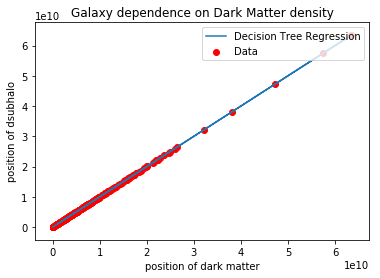

In [83]:
import matplotlib.pyplot as plt
x_label = 'position of dark matter'
y_label = 'position of dsubhalo'
plt_title = 'Galaxy dependence on Dark Matter density'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

# ax.plot(X, bbr_reg_poly.predict( polytransform.fit_transform(X) ) ,label='Poly Regression' )
ax.plot(X, dt_reg.predict(X) ,label='Decision Tree Regression' )
#ax.plot(X, knn_reg.predict(X) ,label='KNN Regression' )
ax.scatter(X ,Y, color='r',label='Data' )
ax.legend(loc=1)

plt.show()

In [ ]:
#now we make the first order neighbours and use them as 6 new features

In [127]:
#use the 3d cell
def first_neighbor_maker(cell):
    neighbor0 = np.copy(cell)
    neighbor_1r = np.copy(cell)
    neighbor_1l = np.copy(cell)
    neighbor_2r = np.copy(cell)
    neighbor_2l = np.copy(cell)
    neighbor_3r = np.copy(cell)
    neighbor_3l = np.copy(cell)
            
    
    neighbor_1r = np.copy(neighbor0)
    neighbor_1r[0] = np.roll(neighbor_1r[0], 1)
    
    neighbor_1l = np.copy(neighbor0)
    neighbor_1l[0] = np.roll(neighbor_1l[0], -1)
    
    neighbor_2r = np.copy(neighbor0)
    neighbor_2r[1] = np.roll(neighbor_2r[1], 1)
    neighbor_2l = np.copy(neighbor0)
    neighbor_2l[1] = np.roll(neighbor_2l[1], -1)        
    
    neighbor_3r = np.copy(neighbor0)
    neighbor_3r[1] = np.roll(neighbor_3r[2], 1)
    neighbor_3l = np.copy(neighbor0)
    neighbor_3l[1] = np.roll(neighbor_3l[2], -1)
    
    return neighbor_1r, neighbor_1l, neighbor_2r, neighbor_2l, neighbor_3r, neighbor_3l

In [132]:
#transform the 3d cell to 1d cell for training
neighbor_1r, neighbor_1l, neighbor_2r, neighbor_2l, neighbor_3r, neighbor_3l = first_neighbor_maker(DM_cell_array)

In [143]:
Y = Subhalo_cell_array.reshape(-1, 1)
Y = np.concatenate((Y, neighbor_1r.reshape(-1, 1)), axis = 1)
Y = np.concatenate((Y, neighbor_1l.reshape(-1, 1)), axis = 1)
Y = np.concatenate((Y, neighbor_2r.reshape(-1, 1)), axis = 1)
Y = np.concatenate((Y, neighbor_2l.reshape(-1, 1)), axis = 1)
Y = np.concatenate((Y, neighbor_3r.reshape(-1, 1)), axis = 1)
Y = np.concatenate((Y, neighbor_3l.reshape(-1, 1)), axis = 1)

Y.shape

(1000, 7)

In [138]:
#Now we have a Y array made of 7 features, actual data plus first order neighbors

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
X_train = X_train.astype('int')
Y_train = Y_train.astype('int')
X_test = X_test.astype('int')
Y_test = Y_test.astype('int')
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(750, 1)
(750, 7)
(250, 1)
(250, 7)


In [142]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)
print("The accuracy of the tree classifier is: {}".format(tree_clf.score(X_test, Y_test)))
print("The importance of features is: {}.".format(tree_clf.feature_importances_))

ValueError: multiclass-multioutput is not supported